In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def objective(solution):
    return (solution**2).sum()

def getBoundries(lb, ub, delta):
    interval = ub - lb
    return -interval * delta / 2, interval * delta / 2

def simulatedAnnealing(lb, ub, d, delta, T_begin, T_end, coolingRate):
    solution = np.random.uniform(lb, ub, size=(1, d))
    iteration = 0
    obj = objective(solution)
    objIter = [obj]
    objAll = [obj]
    bestSolution = solution
    objBest = obj
    boundries = getBoundries(lb, ub, delta)
    
    while T_end < T_begin:
        e = np.random.uniform(*boundries, size=(1, d))
        neighbor = solution + e
        objNeighbor = objective(neighbor)
        
        if objNeighbor <= obj:
            solution = neighbor
            obj = objNeighbor
        else:
            de = objNeighbor - obj
            probabilityOfAcceptance = np.exp(-de/T_begin)
            if np.random.random() < probabilityOfAcceptance:
                solution = neighbor
                obj = objNeighbor
                
        T_begin = T_begin * coolingRate
        iteration += 1
        
        objAll.append(obj)
        
        if obj < min(objIter):
            objIter.append(obj)
        else:
            objIter.append(objIter[-1])
            
        if objIter[-1] < objBest:
            bestSolution = solution
            objBest = obj
    print(iteration)
    print(bestSolution)
    print(objBest)
    return bestSolution, objBest, objIter, objAll


1833
[[ 0.15378362 -0.1673136  -0.25839424 -0.10569909 -0.30843464]]
0.2247150491376159


Text(0, 0.5, 'Cost Function')

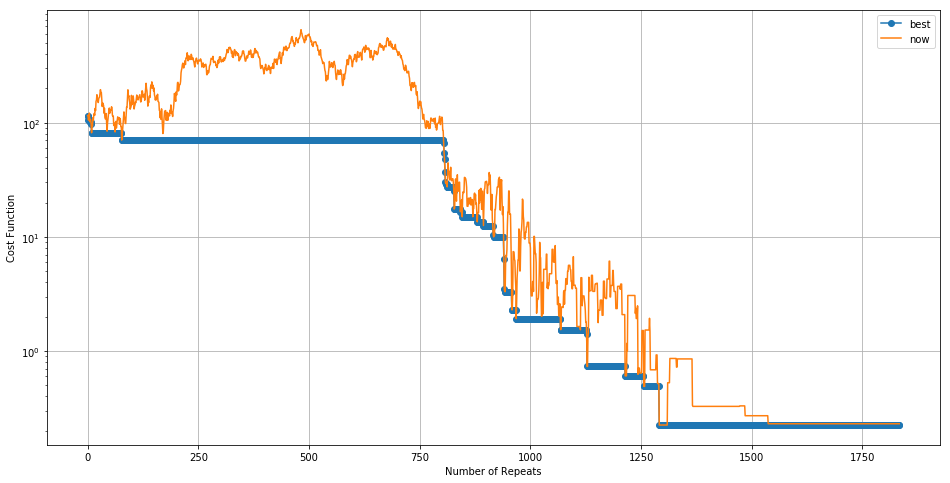

In [3]:
solution, good, iters, all_of = simulatedAnnealing(-10, 10, 5, 0.1, 100000, 1e-3, 0.99)
plt.figure(figsize=(16, 8))
plt.plot(iters, '-o', label='best')
plt.plot(all_of, label='now')
plt.legend()
plt.semilogy()
plt.grid()
plt.xlabel('Number of Repeats')
plt.ylabel('Cost Function')